## Introduction

Les systèmes linéaires invariants (SLI) sont à la base de très nombreux traitements des signaux : communications numériques pour égaliser l'effet du canal de transmission, en débruitage de signaux mesurés par des capteurs physiques ou encore en reproduction du son pour rééquilibrer la balance graves/aigus. Dans ce notebook, on étudiera quelques exemples simples de la classe de SLI la plus courante : les SLI à fonction de transfert rationnelle. Pour l'instant on les définira dans le domaine temporel : l'échantillon de sortie courant $y(n)$ est calculé comme une _somme pondérée_ des échantillons d'entrée et de ceux de sortie déjà calculés ($y(k)$ pour $k \leq n-1$). Soit finalement :

\begin{align}
y(n) = b*{-Q}x(n+Q)&+b*{-Q+1}x(n+Q-1)+\ldots+b*{P-1}x(n-P+1)+b*{P}x(n-P)\\
&+a*{1}y(n-1)+a*{2}y(n-2)+\ldots+a\_{R}y(n-R)
\end{align}

On voit donc que ce calcul se scinde en une partie de _moyenne glissante_ de l'entrée et de _récursion_ sur les valeurs déjà calculées de la sortie. Dans la suite, on va s'intéresser à deux "paradigmes" de ce type de SLI : le filtre moyenneur et le filtre récursif d'ordre 1.

Pour appréhender l'effet de ces filtres deux jeux de données sont fournies :

- réchauffement climatique : des données de concentration en CO2 mesurées au somment du Mauna Loa à Hawaï ([co2.txt](http://perso.enst.fr/bedavid/OASIS/Signaux/co2.txt))
- en audio : une boucle libre de droits ([myloop.wav](http://perso.enst.fr/bedavid/OASIS/Signaux/myloop.wav))

#### mots clefs :

Systèmes Linéaires Invariants, moyenneur, filtre récursif, filtrage.

### Rappel packages

Nous allons utiliser les packages python

- [sounddevice](https://pypi.python.org/pypi/sounddevice/) : pour jouer les signaux audio (numpy arrays) et enregistrer
- [soundfile](https://pypi.python.org/pypi/SoundFile/0.8.1) : pour lire/écrire des fichiers .wav
- [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html) : le package signal de scipy, qui contient notamment la fonction lfilter qui calcule $y(n)$ à l'aide de la précédente équation (dite "aux différences")
- [matplotlib.pyplot](http://matplotlib.org/api/pyplot_api.html) : pour afficher les graphes

## Mon premier moyenneur

Un filtre simple consiste à calculer l'échantillon courant comme la moyenne arithmétique des $M$ échantillons. Par exemple avec $M=3$ :
$$y(n)=\dfrac{1}{3}\{x(n)+x(n-1)+x(n-3)\}$$

Cela s'écrit bien comme l'équation dite "aux différences" donnée plus haut. On peut remarquer que c'est aussi l'écriture d'une convolution : $y(n)=\sum_{p\in\mathbb{Z}}h(p)x(n-p)$ avec $h(n)=1/3$ pour $n=0,1,2$ et $h(n)=0$ partout ailleurs. La fonction de transfert (FT) correspondante est donc : $H(z)=\dfrac{1+z^{-1}+z^{-2}}{3}$.

Pour comprendre quel effet produit ce filtre nous allons l'utiliser sur le fichier audio et écouter le résultat.
Pour cela nous utilisons la fonction `lfilter` du package scipy.signal. Elle prend en argument les coefficients $b$ et $a$ resp. du numérateur et du dénominateur de $H(z)$.


In [15]:
%matplotlib inline 
#qt5 pour avoir les graphes en dehors
import sounddevice as sd
import soundfile as sf
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

#le fichier doit se trouver dans le même répertoire que le notebook
x, Fe = sf.read('../wav/myloop.wav')
x = x[:,1]
M = 3
b = np.ones(M)/M
a = 1
xf = sig.lfilter(b,a,x)


In [16]:
# x = x/np.std(x)  # normalisation rms
sd.play(x[1:20*Fe], Fe)  # on joue le signal original

In [17]:
# xf = xf/np.std(xf)
sd.play(xf[1:20*Fe], Fe)  # on joue le signal filtré

---
> ### Questions de compréhension





































































  1. Entendez vous un(des) effet(s) ?
  2. Selon vous, quel(s) effet(s) devrait produire ce filtre ? Avez-vous des arguments mathématiques pour soutenir votre affirmation ?
  3. Quelle modification/réglage pourrait-on apporter pour rendre l'effet plus évident ?
  4. Décommenter les lignes de normalisation de la forme `x/np.std(x)`, écoutez à nouveau et interprétez.
---


### Mise en évidence des propriétés spectrales

Pour tracer la réponse en fréquence du filtre, il existe la fonction `freqz` utilisée ci-dessous.


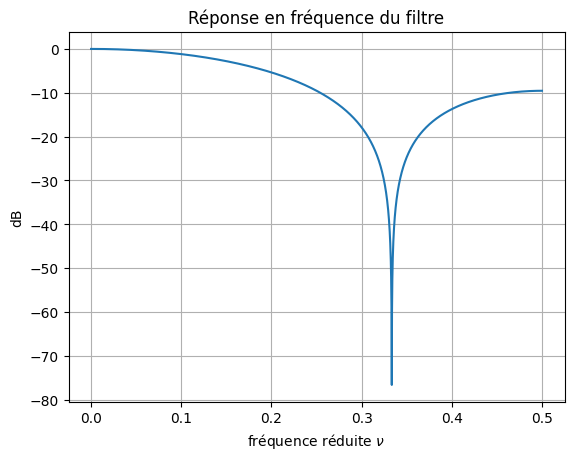

In [21]:
pi = np.pi
w, h = sig.freqz(b, a, 4096)

hdb = 20*np.log10(np.abs(h))
plt.plot(w/2/pi, hdb)
plt.grid()
plt.xlabel(r'fréquence réduite $\nu$')
plt.ylabel('dB')
plt.title('Réponse en fréquence du filtre')
plt.show()

---
> ### Interprétation





































































  Interpréter les résultats obtenus en fonction de vos écoutes et de vos calculs :

  _ici votre réponse_
---


## Mon premier filtre récursif

Le filtre récursif le plus simple réalise l'opération entrée/sortie suivante :
$y(n)=\alpha y(n-1)+x(n)$. En vous inspirant de ce qui précède, filtrer le signal audio fourni à l'aide de ce SLI avec $\alpha =0.75$.


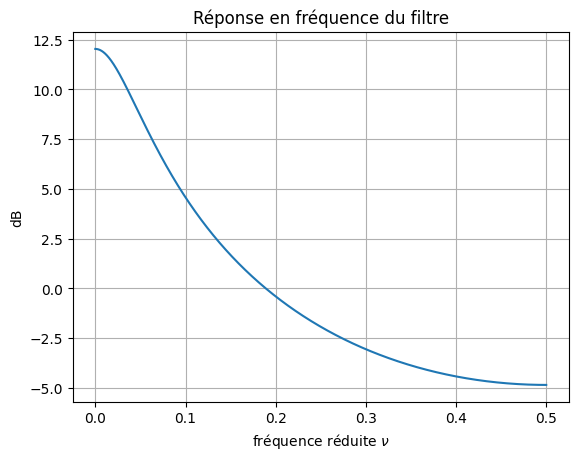

In [37]:
# ici votre code
x, Fe = sf.read('../static/myloop.wav')
x = x[:, 1]
alpha = 0.75
b = [1]
a = [1, -alpha]
xf = sig.lfilter(b, a, x)

pi = np.pi
w, h = sig.freqz(b, a, 4096)

hdb = 20*np.log10(np.abs(h))
plt.plot(w/2/pi, hdb)
plt.grid()
plt.xlabel(r'fréquence réduite $\nu$')
plt.ylabel('dB')
plt.title('Réponse en fréquence du filtre')
plt.show()

In [26]:
x = x/np.std(x)  # normalisation rms
sd.play(x, Fe)  # on joue le signal original

In [27]:
xf = xf/np.std(xf)  # normalisation rms
sd.play(xf, Fe)  # on joue le signal filtré

---
>### Questions et interprétations

Répondre aux mêmes questions/interprétations que précédemment.

>*ici vos réponses*

---


---

## Etude du réchauffement climatique

On veut observer la tendance à l'accroissement de la proportion de CO2 liée au réchauffement climatique. Pour cela, nous cherchons ici à réduire la composante saisonnière (oscillations).

Le code ci-dessous vous permet de charger le fichier et d'afficher les données, ensuite c'est à vous d'utiliser le moyenneur et/ou le filtre récursif vus plus haut pour obtenire l'effet souhaité. Etapes conseillées :

> 1. Analyse des données (temporelle,spectrale) : pouvez vous interpréter les données et leur spectre ? proposer un modèle mathématique pour ces données ?
> 2. A l'aide de `freqz` et de vos calculs ajuster les paramètres ($M$,$\alpha$) des filtres pour obtenir une visualisation de la tendance générale la meilleure possible, soit avec un moyenneur soit avec un filtre récursif.
> 3. Faire un choix entre ces 2 filtres. Ecrire les raisons de ce choix.
> 4. A quel compromis, limites doit-on faire face ?


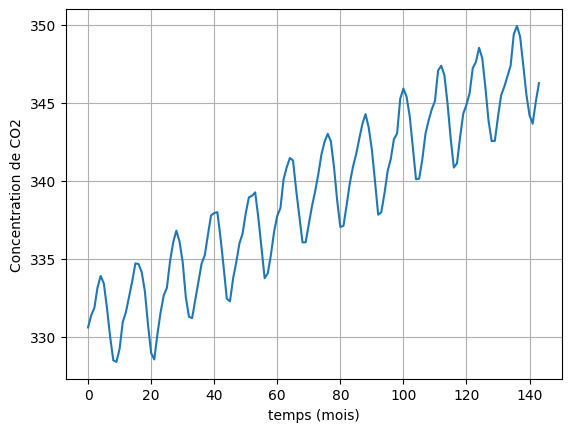

In [23]:
# -*- coding: utf-8 -*-
x = np.loadtxt('../static/co2.txt', skiprows=4)
plt.plot(x)
plt.xlabel('temps (mois)')
plt.ylabel('Concentration de CO2')
plt.grid()
plt.show()

In [1]:
# votre code ici